<center><h1>Projet ACP : Analyse des crises économiques en Afrique</h1></center>
<h2>Réalisé par : Mouna Guerrab, Afaf Matouk, Mohamed El Jaouhari et Ilyas El Amrani</h2>
<h2>Encadré par : Café Cordòba</h2>
<p>Description : </p>

<center><h2>Partie 1 : Nettoyage et Transformation des données </h2></center>

In [5]:
import pandas as pd
import numpy as np

<h3>Chargement des données</h3>

In [18]:
df = pd.read_csv("./african_crises.csv")

In [7]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


<h3>Suppression de la colonne 'cc3' (monnaie) et encodage des valeurs de la colonne 'banking_crisis':</h3>
<p>La colonne 'cc3' est supprimé parcequ'elle est inutile pour notre analyse.</p>

In [8]:
df = df.drop("cc3",axis=1)
df = df.replace({'banking_crisis': {'crisis': 1, 'no_crisis': 0}})

<h3>Titre:</h3>
<p>Decription.</p>

In [9]:
df = df.groupby('country').agg({'exch_usd':'mean','inflation_annual_cpi':'mean',
'year':'count',
'systemic_crisis':'sum','domestic_debt_in_default':'sum',
'sovereign_external_debt_default':'sum',
'gdp_weighted_default':'sum',
'independence':'sum',
'currency_crises':'sum',
'inflation_crises':'sum',
'banking_crisis':'sum'})


<h3>Enregistrement des données :</h3>

In [10]:
df.to_csv("african_crisis_new.csv",header=True)

<h3>Affichage des données résultantes:</h3>

In [11]:
df

,exch_usd,inflation_annual_cpi,year,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,independence,currency_crises,inflation_crises,banking_crisis
country,,,,,,,,,,,
Algeria,20.177565,9.920998,85,4,0,6,1.38,47,9,14,4
Angola,15.099671,152.090470,77,0,12,13,0.00,30,22,26,7
Central African Republic,367.686066,5.849863,58,19,0,33,0.00,55,2,2,19
Egypt,1.006045,4.762431,155,6,0,6,2.40,155,8,11,11
Ivory Coast,153.320635,6.109254,63,4,0,29,0.00,55,1,4,4
Kenya,30.713180,8.725192,67,13,0,6,0.00,52,9,4,8
Mauritius,13.759661,6.854715,68,0,0,0,0.00,52,5,6,1
Morocco,5.865309,8.680358,75,2,0,6,0.78,59,8,10,2
Nigeria,38.951022,14.766862,60,10,0,9,0.00,54,10,12,11


<center><h2>Partie 2 : Analyse des données avec ACP </h2></center>

<h3>Définition des outils et fonctions utilisés pour l'analyse:</h3>
<p> Parmi les fonctions définit ci-dessous :</p>
<ul>
<li><b>showdata2d</b> : Pour visualiser les données selons 2 composantes factorielles.</li>
<li><b>showdata3d</b> : Pour visualiser les données selons 3 composantes factorielles.</li>
<li><b>inertie</b> : Pour calculer l'inertie (indique la quantité d'information).</li>
<li><b>eboulis</b> : Pour visualiser l'eboulis des valeurs propres.</li>
<li><b>showdata2d</b> : Pour visualiser les données selons 2 composantes factorielles.</li>
<li><b>makeresultsfolder</b> : Pour créer le dossier ou stocker les résultats et changer la répertoire de travail vers ce dossier.</li>
<li><b>applyPCA</b> : Regroupe toutes les fonctionnalités pour faire l'analyse en composantes principales, créer et exporter les tableaux et les graphes important ainsi qu'un log de toute l'opération.</li>
</ul>

In [16]:

import pandas as pd 
import numpy as np
import os
from datetime import datetime

def showdata2d(XA,data,title,perc,logfile):
    #importation de la librairie graphique
    import matplotlib.pyplot as plt

    XAD = pd.DataFrame(XA,index=data.index)
    #préparation du graph:
    fig,ax = plt.subplots(figsize=(12,12))
    ax.plot(XA[:,0],XA[:,1],'or')
    ax.set_xlabel(f"F1 {round(perc[0]*100,2)}")
    ax.set_ylabel(f"F2 {round(perc[1]*100,2)}")
    ax.set_title(title)

    #ajout des labels (noms) :
    for e in data.index:
        ax.text(XAD.loc[e,0],XAD.loc[e,1],e)

    plt.savefig(f'./figures/show2D.svg',format='svg',bbox_inches='tight')
    logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Figure 2D exportée avec succès : show2D.svg ...')
    #faire afficher le graph
    plt.show()
    

def showdata3d(XA,data,title,perc,logfile):
    #importation de la librairie graphique
    import matplotlib.pyplot as plt

    XAD = pd.DataFrame(XA,index=data.index)
    #préparation du graph:
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(projection='3d')
    labels = data.index
    for i in range(XA.shape[0]):
        x,y,z = tuple(XA[i,:])
        ax.scatter(x, y, z,label=f'{labels[i]}', marker='o')
    ax.set_xlabel(f"F1 {round(perc[0]*100,2)}")
    ax.set_ylabel(f"F2 {round(perc[1]*100,2)}")
    ax.set_zlabel(f"F3 {round(perc[2]*100,2)}")
    ax.set_title(title)

    fig.legend(bbox_to_anchor=(1.3, 0.8),loc="upper right")
    plt.tight_layout()
    plt.savefig(f'./figures/show3D.svg',format='svg',bbox_inches='tight')
    logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Figure 3D exportée avec succès : show3D.svg ...')

    #faire afficher le graph
    plt.show()
    

def inertie(donnee) :
    sigmas = np.std(donnee,axis=0,ddof=0)
    return np.sum(sigmas**2)

def eboulis(X,eignvs,logfile):
    #librairie graphique
    import matplotlib.pyplot as plt
    #préparer le graphique
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(range(1,X.shape[1]+1),eignvs,".-")
    ax.set_xlabel("Nb. facteurs")
    ax.set_ylabel("Val. propres")
    plt.title("Eboulis des valeurs propres")
    #rajout du seuil du Kaiser
    ax.plot([1,6],[1,1],"r--",linewidth=1)

    plt.savefig(f'./figures/EDVP.svg',format='svg',bbox_inches='tight')
    logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Figure d\'eboulis exportée avec succès : EDVP.svg ...')

    plt.show()
    


def makeResultsFolder():
    foldername='./Results/'
    i=0
    while(os.path.exists(foldername)):
        i+=1
        foldername=f'./Results_{i}/'

    os.mkdir(foldername)
    os.chdir(foldername)
    
def applyPCA(path,index,cols):
    try:
        #Verification et chargement des données
        if not str(path).lower().endswith('.csv'):
            raise ValueError
        if index == None : 
            data = pd.read_csv(path,header=None)
        else:
            data = pd.read_csv(path).set_index(index)
            
        if cols!=None:
            data.columns = cols

        #Initialisation des dossier des résultats et du fichier log
        makeResultsFolder()
        logfile = open('./log.txt','w',encoding='latin-1')
        if(not os.path.exists('./figures/')): os.mkdir('./figures/')
        if(not os.path.exists('./CSVs/')): os.mkdir('./CSVs/')
        logfile.write(f'{datetime.now().isoformat()} : [INIT] Dossiers crées avec succès : \n + {os.sep.join([os.getcwd(),"figures"])}\n + {os.sep.join([os.getcwd(),"CSVs"])}')
            
        print('Données pures :',data,sep='\n')

        data.dropna(axis=0)
        X = data.values.astype('float64')
        

        R = np.corrcoef(X,rowvar=False)
        print('Matrice de coorélation : ',R,sep='\n')
        #Exportation de la matrice:
        pd.DataFrame(data=R,index=data.columns,columns=data.columns).to_csv('./CSVs/CorrMat.csv',header=True)
        logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Matrice de coorélation exporté avec succès : CorrMat.csv ...')

        eignvs = np.linalg.eigvals(R)
        print('Valeurs propres : ',eignvs,sep='\n')
        #Exportation des Valeurs propres:
        pd.DataFrame(data=eignvs).to_csv('./CSVs/eigVals.csv',header=False,index=False)
        logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Valeurs propres exportées avec succès : eigVals.csv ...')


        #Trouver le nombre de facteurs en utilisant le critère de Kaiser
        q = 0
        for e in eignvs :
            if(e<1):
                break
            q+=1
            
        #Plot de l'eboulis : 
        eboulis(X,eignvs,logfile)
        print(f'Le nombre de facteurs est {q}')
        logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Le nombre de facteurs est {q} ...')
            
        #importer la classe de calcul
        #!pip install fanalysis
        from fanalysis.pca import PCA
        acp = PCA(std_unit=True,row_labels=data.index,col_labels=data.columns)
        #lancer les calculs sur les données
        XA = acp.fit_transform(X)[:,:q]
        #Exportation des Données transformées:
        pd.DataFrame(data=XA,index=data.index,columns=[f'F{i}' for i in range(q)]).to_csv('./CSVs/tranDat.csv',header=True)
        logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Données transformées exportées avec succès : tranDat.csv ...s')
        

        #inertie initiale :
        II = sum(eignvs)
        #inertie de nouveau espace :
        IV = sum(eignvs[:q])

        print('Données transformés : ',pd.DataFrame(XA,index=data.index),sep='\n')
        from matplotlib import pyplot as plt
        import matplotlib.patches as patches
        if(q==1):
            plt.scatter(XA,0*XA.shape[0])
            plt.xlabel(f'F1 {round(eignvs[0]*100/eignvs.sum(),4)}')
            plt.legend()
            plt.savefig(f'./figures/show1D.svg',format='svg',bbox_inches='tight')
            logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Figure 1D exportée avec succès : show1D.svg ...')
        if(q==2):
            showdata2d(XA,data,f'Qualité de la représentation : {round((IV/II)*100,2)}%',[eignvs[0]/sum(eignvs),eignvs[1]/sum(eignvs)],logfile)

        if(q==3):
            showdata3d(XA,data,f'Qualité de la représentation : {round((IV/II)*100,2)}%',[eignvs[0]/sum(eignvs),eignvs[1]/sum(eignvs),eignvs[2]/sum(eignvs)],logfile)
        if(q>3):
            msg = 'Dimension supérieur à 3, on peut pas visualiser le graph, des visualisations 2D/3D peuvent être faites...'
            print(msg)
            logfile.write(f'\n{datetime.now().isoformat()} : [WARN] Dimension supérieur à 3, on peut pas visualiser le graph, des visualisations 2D/3D peuvent être faites...')

        #Contribution des individus dans les différents facteurs : 
        lig_ctr=acp.row_contrib_[:,:q]
        tmpData = pd.DataFrame(lig_ctr,index=data.index)
        print('Contributions des individus par facteur : ',tmpData,sep="\n")
        tmpData.to_csv('./CSVs/CIF.csv',header=True)
        logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Contributions des individus par facteur exporté avec succèes : CIF.csv')

        #Contribution des individus
                
        for j in range(0,q):
            print(f'Contributions des individus à la composante {j}')
            plt.bar(range(len(data.index)),lig_ctr[:,j],tick_label=data.index)
            plt.title(f'Contribution des individus à la composante {j}')
            plt.xticks(rotation = 90)
            plt.savefig(f'./figures/CIF_{j}.svg',format='svg',bbox_inches='tight')
            logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Contributions des individus au facteur {j}  exporté avec succèes : CIF_{j}.csv')
            plt.show()
            
            
        #Contribution des variables dans les différents facteurs : 
        col_ctr=acp.col_contrib_[:,:q]
        tmpData = pd.DataFrame(col_ctr,index=data.columns)
        print('Contributions des variables par facteur : ',tmpData,sep="\n")
        tmpData.to_csv('./CSVs/CVF.csv',header=True)
        logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Contributions des variables par facteur exporté avec succèes : CVF.svg')

        for j in range(0,q):
            print(f'Contributions des variables au facteur {j}')
            plt.bar(range(len(data.columns)),col_ctr[:,j],tick_label=data.columns)
            plt.title(f'Contribution des variables à la composante {j}')
            plt.xticks(rotation = 90)
            plt.savefig(f'./figures/CVF_{j}.svg',format='svg',bbox_inches='tight')
            plt.show()
            logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Contributions des variables au facteur {j}  exporté avec succèes : CVF_{j}.svg')

        #Cercle de corrolation des variables : 
        ploted = []
        for j in range(0,q):
            for i in range(0,q):
                if i!=j and f"{j},{i}" not in ploted and f"{i},{j}" not in ploted :
                    print(f'Cercle de corrélation des facteurs {j} et {i}')
                    fig = plt.figure(figsize=(12,12))
                    ax = fig.add_subplot(111, aspect="equal")
                    ax.add_artist(patches.Circle((0, 0), 1.0, color="black", fill=False))
                    
                    x_serie = acp.col_cor_[:, j - 1]
                    y_serie = acp.col_cor_[:, i - 1]
                    labels = acp.col_labels_
                    
                    for k in np.arange(0, x_serie.shape[0]):
                        x = x_serie[k]
                        y = y_serie[k]
                        label = labels[k]
                        delta = 0.1 if y >= 0 else -0.1
                        ax.annotate("", xy=(x, y), xytext=(0, 0),
                                    arrowprops={"facecolor": "black",
                                                "width": 1,
                                                "headwidth": 4})
                        ax.text(x, y + delta, label,
                                horizontalalignment="center", verticalalignment="center",
                                color="blue")
                    
                    plt.axvline(x=0, linestyle="--", linewidth=0.5, color="k")
                    plt.axhline(y=0, linestyle="--", linewidth=0.5, color="k")
                    ax.set_xlim(-1.3, 1.3)
                    ax.set_ylim(-1.3, 1.3)
                    plt.title("Correlation circle")
                    plt.xlabel("Dim " + str(j) + " ("
                                + str(np.around(acp.eig_[1, i - 1], 2)) + "%)")
                    plt.ylabel("Dim " + str(i) + " ("
                                + str(np.around(acp.eig_[1, j - 1], 2)) + "%)")
                    plt.savefig(f'./figures/CCF{j}_{i}.svg',format='svg',bbox_inches='tight')
                    plt.show()
                    
                    logfile.write(f'\n{datetime.now().isoformat()} : [INFO] Cercle de corrélation des facteurs {j} et {i} exporté avec succèes : CCF_{j}_{i}.svg')
                    ploted.append(f"{j},{i}")
        
        logfile.write(f'\n{datetime.now().isoformat()} : [END] Toutes les opérations ont étaient effectuées avec succès, naviguez les dossiers \'CSVs\' et \'figures\' pour retrouver les fichier résultants...')
        # Changer la répértoire courante au répértoire du projet et fermer le curseur du fichier.
        logfile.close()
        os.chdir('../')
    except:#en cas d'erreur, logger que l'erreur est produite (généralement provien du fichier en entrée), changer la répértoire courante au répértoire du projet et fermer le curseur du fichier.
        logfile.write(f'\n{datetime.now().isoformat()} : [ERR] Erreur, Verifiez vos données en entrée!')
        if(os.getcwd().endswith('Results')):os.chdir('../')
        logfile.close()


<h3>Partie 2: Application de la fonction applyPCA sur nos données.</h3>
<p>La variable col est utiliser pour nommer les diffèrentes colonnes et le paramètre <b>'index'</b> permet de préciser l'index de nos données, notre cas c'est <b>'country'</b>.</p>

Données pures :
                            exch_usd  inflation_annual_cpi  nbr_years  \
country                                                                 
Algeria                    20.177565              9.920998         85   
Angola                     15.099671            152.090470         77   
Central African Republic  367.686066              5.849863         58   
Egypt                       1.006045              4.762431        155   
Ivory Coast               153.320635              6.109254         63   
Kenya                      30.713180              8.725192         67   
Mauritius                  13.759661              6.854715         68   
Morocco                     5.865309              8.680358         75   
Nigeria                    38.951022             14.766862         60   
South Africa                1.719339              5.190383        114   
Tunisia                    50.692807              9.291669         75   
Zambia                      1.11634

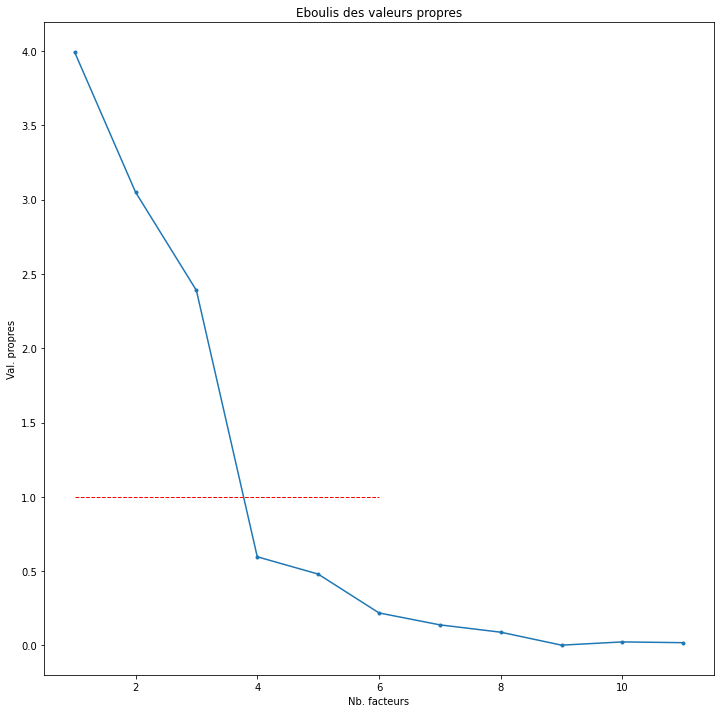

Le nombre de facteurs est 3
Données transformés : 
                                 0         1         2
country                                               
Algeria                  -1.175915  0.192882 -0.418525
Angola                    0.588644  2.399819 -1.697025
Central African Republic  3.526065 -3.552521  1.616002
Egypt                    -2.866108  0.600196  3.866797
Ivory Coast               0.719610 -2.078443 -0.529915
Kenya                     0.341168 -0.985107 -0.401143
Mauritius                -1.276320 -0.693985 -1.645715
Morocco                  -1.278125 -0.150614 -0.873829
Nigeria                   0.663060 -0.483279 -0.551235
South Africa             -2.734007  0.408824  1.189025
Tunisia                  -0.559110 -0.435152 -0.587389
Zambia                   -0.119556  1.145721 -1.478421
Zimbabwe                  4.170593  3.631660  1.511374


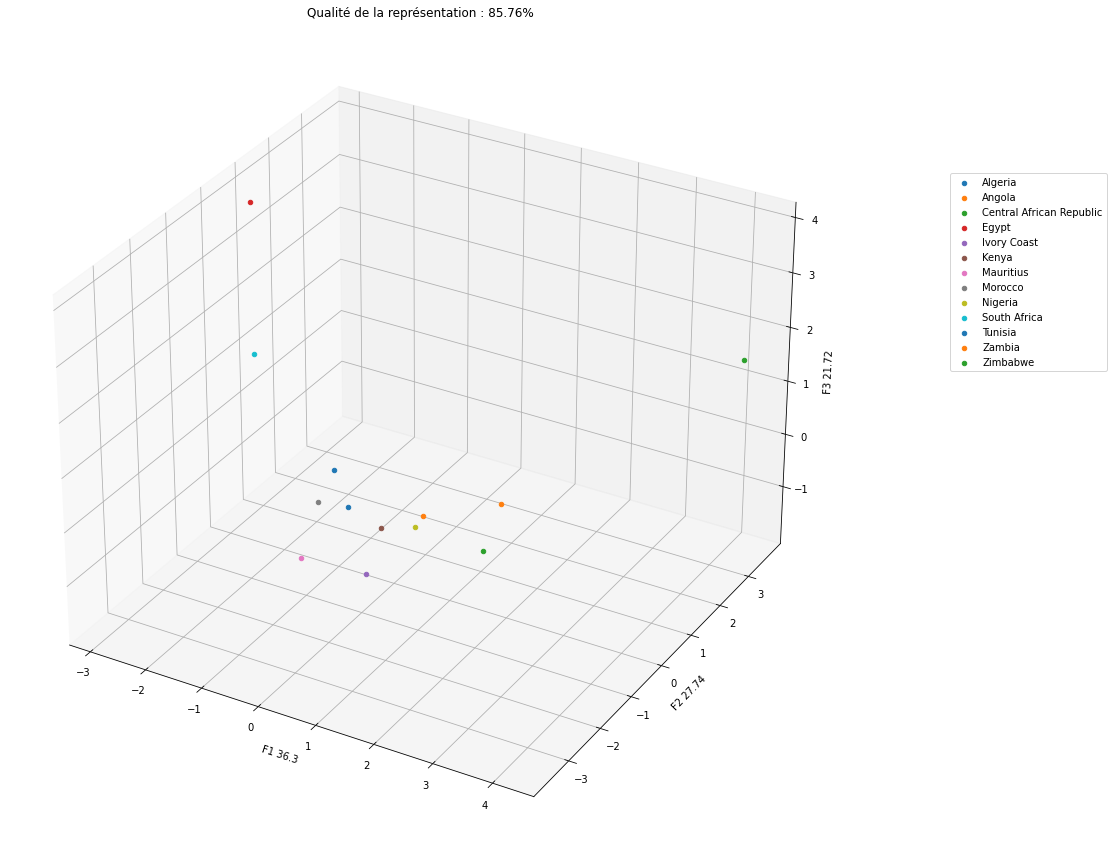

Contributions des individus par facteur : 
                                  0          1          2
country                                                  
Algeria                    2.663847   0.093798   0.563860
Angola                     0.667518  14.520039   9.270559
Central African Republic  23.951788  31.818830   8.406458
Egypt                     15.824949   0.908233  48.131773
Ivory Coast                0.997590  10.891489   0.903945
Kenya                      0.224230   2.446685   0.517997
Mauritius                  3.138167   1.214258   8.718429
Morocco                    3.147053   0.057193   2.458003
Nigeria                    0.846961   0.588853   0.978145
South Africa              14.399800   0.421390   4.551043
Tunisia                    0.602216   0.477412   1.110658
Zambia                     0.027536   3.309547   7.035990
Zimbabwe                  33.508345  33.252273   7.353140
Contributions des individus à la composante 0


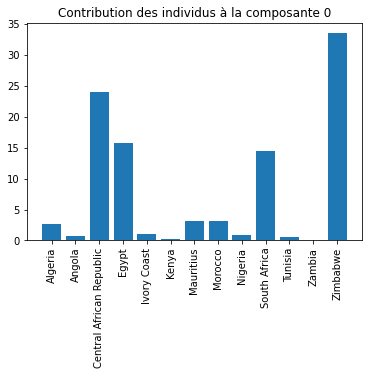

Contributions des individus à la composante 1


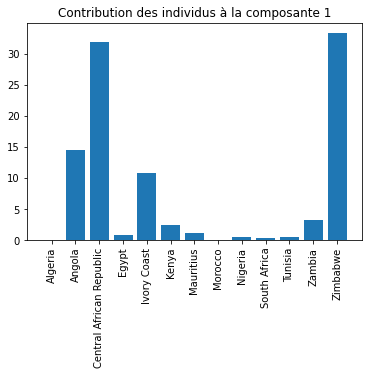

Contributions des individus à la composante 2


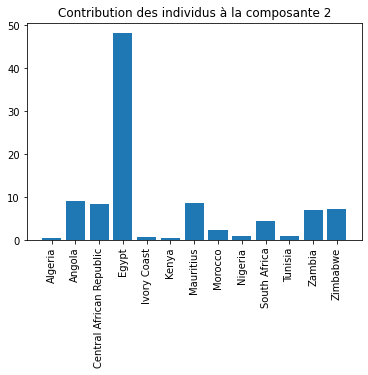

Contributions des variables par facteur : 
                                         0          1          2
exch_usd                          8.125147  16.707999   1.920998
inflation_annual_cpi              9.093724  11.817951   3.328733
nbr_years                         7.200200   5.019207  22.574115
systemic_crisis                  14.344352   1.936007   7.912657
domestic_debt_in_default          9.280395  17.262373   0.925222
sovereign_external_debt_default  17.479065   0.558667   2.700194
gdp_weighted_default             12.707714   0.465152  16.241818
independence                      8.135006   0.001471  26.099248
currency_crises                   0.230683  25.975263   0.547339
inflation_crises                  0.893084  20.114408   2.744853
banking_crisis                   12.510631   0.141502  15.004823
Contributions des variables au facteur 0


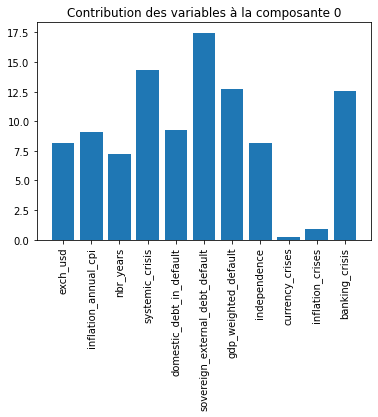

Contributions des variables au facteur 1


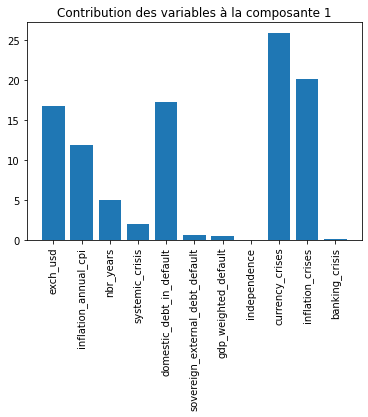

Contributions des variables au facteur 2


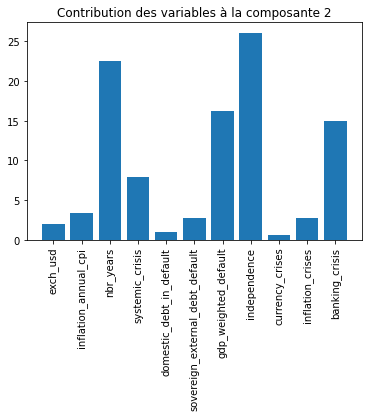

Cercle de corrélation des facteurs 0 et 1


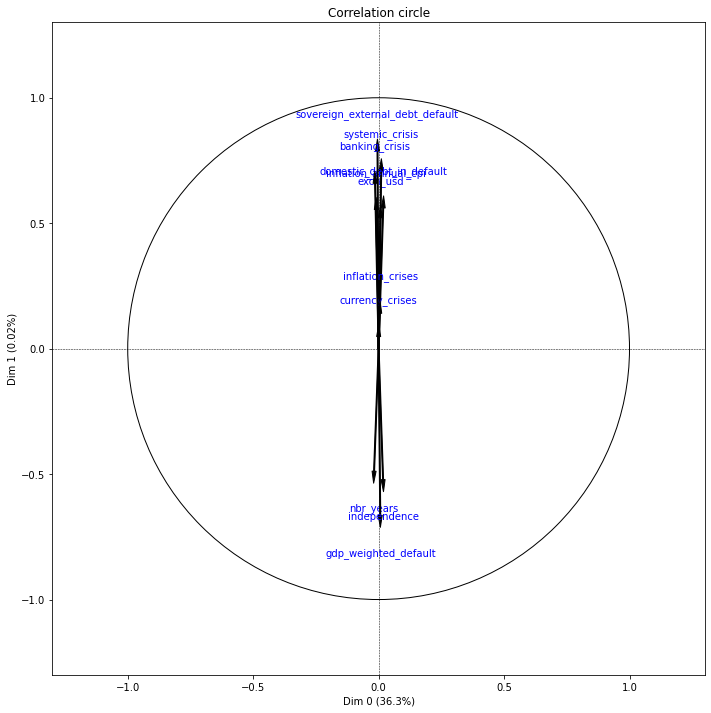

Cercle de corrélation des facteurs 0 et 2


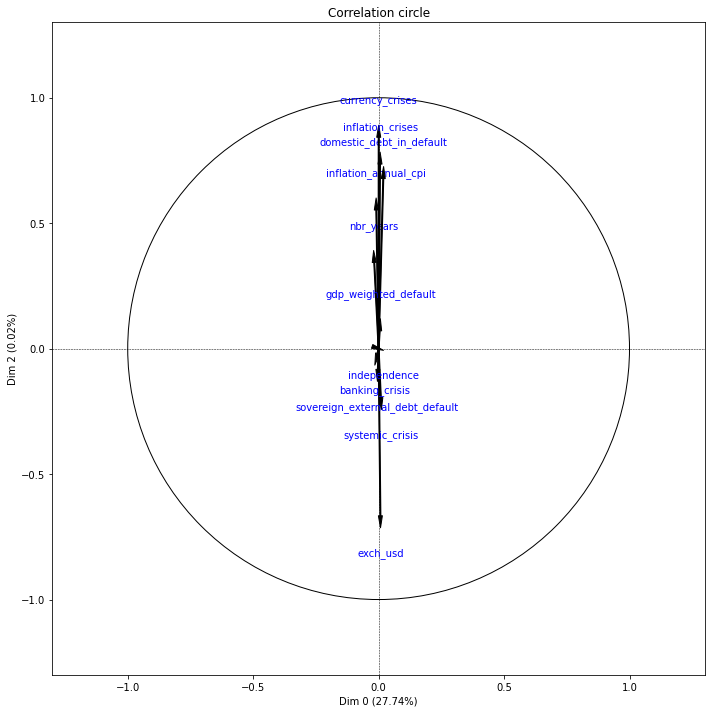

Cercle de corrélation des facteurs 1 et 2


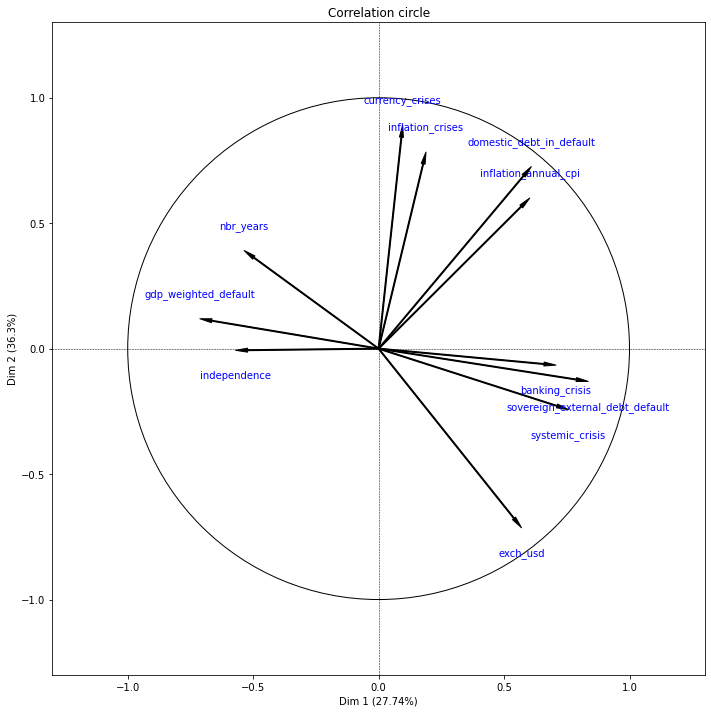

In [17]:
col = ["exch_usd","inflation_annual_cpi","nbr_years","systemic_crisis","domestic_debt_in_default","sovereign_external_debt_default","gdp_weighted_default","independence","currency_crises","inflation_crises","banking_crisis"]
applyPCA(r"D:\Projet\Projet-ACP\african_crisis_new.csv",index="country",cols=col)